<a href="https://colab.research.google.com/github/AishwaryaMuchandi/B.E-Project/blob/master/neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()#load the dataset ie training and testing dataset in the xtrain and y train 

In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0]==y_train.shape[0]),"the number of images is not equal to the number of labels"
assert(X_test.shape[0]==y_test.shape[0]),"the number of images is not equal to the number of labels"
assert(X_train.shape[1:]==(28,28)),"the dimensions of images are not 784"
assert(X_test.shape[1:]==(28,28)),"the dimensions of images are not 784"


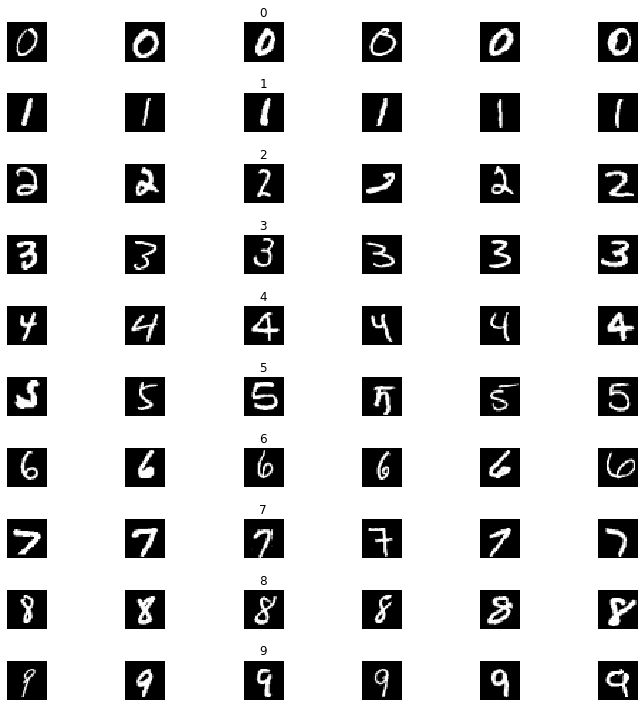

In [0]:
num_of_samples=[]
cols=6 #uniform
num_classes=10
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(10,10))# this is used to provide the grid layout for the datasets
fig.tight_layout()
for i in range(cols): #this for loop is for the scannint he number of cols ie scanning the each different classes in the mnist datasets
  for j in range(num_classes):#this for loop is for the scanning the number of images belonging the the ith classes
    x_selected=X_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:] ,cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'number of images')

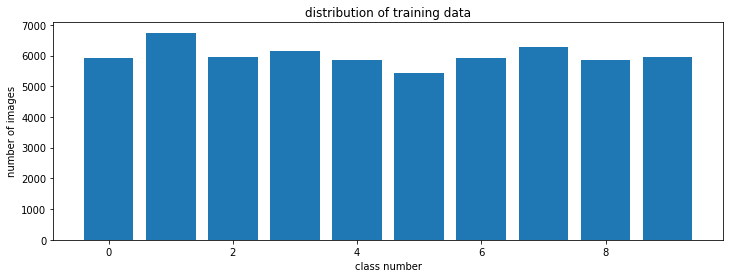

In [0]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("distribution of training data")
plt.xlabel("class number")
plt.ylabel("number of images")

In [0]:
# 1st step of preparing the data is to preparing the data labels
y_train =to_categorical(y_train,10) # it takes the two argument one the dataset and second the number of classes for that datasets
y_test=to_categorical(y_test,10)

In [0]:
 
X_train=X_train/255 #this peace of code is used to normalise the datasets
X_test=X_test/255   # 255 because the total number of image is 60000 and each image intensity is o to 255 and hence the range of normalize value of image is between o and 1
                    # this ensure that the  maximum value of the image  that is 255  is normalize to 1 it decreases the varient among the data for the input of the neural network we ensures 
                    # that the input data must have the low variance so that neural network will learn more quickly and accurately 

In [0]:
# Reshaping the image from 2d dimenson matrix to single dimension current it has the array of 28 by 28
# we will pass it in single short of 784
num_pixels=784
X_train=X_train.reshape(X_train.shape[0],num_pixels)
X_test=X_test.reshape(X_test.shape[0],num_pixels)
print(X_train.shape)
print(X_test.shape)
#data is clearly formatted as the input required by the neural network


(60000, 784)
(10000, 784)


In [0]:
#passing the above formatted data to the base deep neural network model to test its accuracy
# the hidden layers are added by keeping the two concepts in mind 
#underfitting :small training error
#overfittinh : gap between the test and training error grows larger
#the hiiden layers are added based on the training the model and how much the model gives the accuracy based on that the number of hidden layers are decide
def create_model():
  model=Sequential()
  model.add(Dense(10,input_dim=num_pixels,activation='relu'))# num_pixel in first argument is used to memorise model about the things ie 784 times
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))  
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [0]:
model=create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
Total params: 8,290
Trainable params: 8,290
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history=model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.7006 - acc: 0.7740 - val_loss: 0.3888 - val_acc: 0.8820
Epoch 2/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.3767 - acc: 0.8906 - val_loss: 0.2695 - val_acc: 0.9248
Epoch 3/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.3168 - acc: 0.9063 - val_loss: 0.2556 - val_acc: 0.9315
Epoch 4/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2983 - acc: 0.9132 - val_loss: 0.2482 - val_acc: 0.9293
Epoch 5/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2837 - acc: 0.9172 - val_loss: 0.2301 - val_acc: 0.9335
Epoch 6/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2805 - acc: 0.9184 - val_loss: 0.2548 - val_acc: 0.9253
Epoch 7/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.2676 - acc: 0.9219 - val_loss: 0.2382 - val_acc:

Text(0.5, 0, 'epoch')

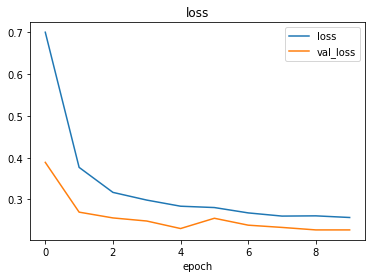

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epoch')
#on every running the celll the error gets cross with the loss that is every time the epochs generated give the different probability
#the validation error is higher than the training error that means its doing good job of trainig on training data but performs very poorly at validation set at some point


Text(0.5, 0, 'epoch')

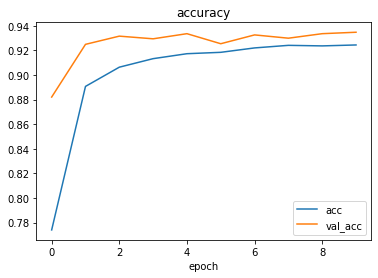

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('accuracy')
plt.xlabel('epoch')
#on running the validation accuracy is higher but as the model overfits the validation accuracy starts the overfits and the training accuracy increases


In [0]:
 score =model.evaluate(X_test,y_test,verbose=0)
 print((type(score)))
 print('Test score:',score[0])
 print("test accuracy:",score[1])

<class 'list'>
Test score: 0.262539118270576
test accuracy: 0.9254


<Response [200]>


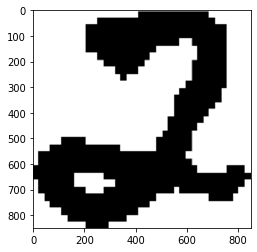

In [0]:
import requests
from PIL import Image
url='https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response =requests.get(url,stream=True)
print(response)
img=Image.open(response.raw)
plt.imshow(img)

(850, 850, 4)
(28, 28, 4)
(28, 28)


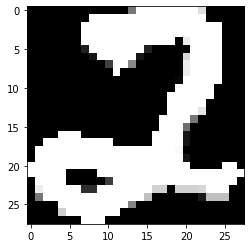

In [0]:
import cv2
#here the background image has the intensity of values 255 and foreground has the value 0
#but our neural network was train with black bg and white color image therefore it doesnt recognize this images
#the bitwise not will subtract the each value of the image from 255 and reverse the image 
img_array=np.asarray(img) # converts the input data in to the array and the significance of doing is that we have to resize the image in to 28 by 28
print(img_array.shape)
resized=cv2.resize(img_array,(28,28))
print(resized.shape)#the image is resized into 28 by 28 pixel
gray_scale=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
image=cv2.bitwise_not(gray_scale)
print(gray_scale.shape)
plt.imshow(image,cmap=plt.get_cmap("gray"))


In [0]:
image=image/255
image=image.reshape(1,784)


In [0]:
prediction=model.predict_classes(image)
print("prediction:",str(prediction))

prediction: [8]
